## CP1 - MACHINE LEARNING & MODELLING: Detecção de Fraude em Cartão de Crédito com Machine Learning

### Nome: Claudio A. C. Junior

### Entendimento do problema

Uma instituição financeira que tem diversas transações de crédito diárias e quer construir um modelo de previsão para que possam se assegurar cada vez mais da confiabilidade de fraude ou não em uma transação. 
Esse modelo é importante pois, considerando a efetivação de uma transação fraudulenta (ou seja, aquelas que não são identificada como fraude), a instituição pode sofrer danos financeiros e a perca da sensação de segurança do cliente, já que se trata de um valor indevido sendo debitado da conta de um usuário, ou de um golpe no qual o valor da transação nunca chega ao destino final.
Para iniciarmos o desenvolvimento do modelo, foi disponibilizado uma base de dados de transações de crédito com algumas variaveis.

----------------------------------------------------------------------------------------------------------

### Mineração de Dados

In [1]:
# Biblioteca do sistema operacional, vou usar pra lidar com caminhos e arquivos
import os

# Importando o pandas, que vou usar pra trabalhar com tabelas/datasets
import pandas as pd

In [2]:
# Carregando o dataset

file_path ="C:/Users/claud/OneDrive/Documentos/FIAP-IA-1TIAPR/Rascunhos/TransacFraud/db"

dataset = os.path.join(file_path, 'card_transdata.csv')
df = pd.read_csv(dataset)

In [3]:
# Visualiza as 5 primeiras linhas pra ter uma noção inicial do df
df.head(5)

# Pega a quantidade de linhas do dataframe
rows = df.shape[0]

# Pega a quantidade de colunas do dataframe
columns = df.shape[1]

# Exibe a estrutura básica do df (linhas e colunas)
print(f'{rows} linhas e {columns} colunas.')

# Mostra estatísticas gerais das colunas numéricas
print("Overview do DF:\n", df.describe())

1000000 linhas e 8 colunas.
Overview do DF:
        distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985                        3.355748   
max          10632.723672                    11851.104565   

       ratio_to_median_purchase_price  repeat_retailer       used_chip  \
count                  1000000.000000   1000000.000000  1000000.000000   
mean                         1.824182         0.881536        0.350399   
std                          2.799589         0.323157        0.477095   
min                          0.004399         0.000000        0.000000   
25%                          0.4756

Importamos bibliotecas que foram utilizadas para a mineração e baixamos os dados para previsão da paltaforma Keggle, no dataset de transação de crédito.

Aplicando a Mineração de dados, chegamos as seguintes conclusões:

- Identificamos que o db tem 1.000.000 de linhas e 8 colunas.
- As colunas 'distance_from_home', 'distance_from_last_transaction' e 'ratio_to_median_purchase_price' tem valores despadronizados e com uma margem de diferença grande entre valores e max.
- As demais colunas tem valores padronizados e com pouca margem de diferença.
- Não temos valores nulos e nem duplicados.

### Data Cleaning (Limpeza de Dados):

In [4]:
# Remove linhas que têm valores ausentes pra evitar problemas nas análises
df = df.dropna()

# Remove linhas duplicadas pra garantir que o DF fique limpo e sem repetições
df = df.drop_duplicates()

In [5]:
# Importa o StandardScaler, que serve pra padronizar as colunas numéricas
from sklearn.preprocessing import StandardScaler

# Cria a ferramenta de padronização
scaler = StandardScaler()

# Lista das colunas que precisam ser normalizadas
colunas_despadronizadas = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

# Aplica a padronização nessas colunas e substitui no DF
df[colunas_despadronizadas] = scaler.fit_transform(df[colunas_despadronizadas])

# Mostra as estatísticas já com as colunas padronizadas
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,-4.365575e-17,-7.673862e-18,-2.546585e-17,0.881536,0.350399,0.100608,0.650552,0.087403
std,1.000001e+00,1.000001e+00,1.000001e+00,0.323157,0.477095,0.300809,0.476796,0.282425
min,-4.071511e-01,-1.948839e-01,-6.500182e-01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.479205e-01,-1.834088e-01,-4.816812e-01,1.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.547919e-01,-1.562457e-01,-2.952096e-01,1.000000,0.000000,0.000000,1.000000,0.000000
75%,-1.353107e-02,-6.503759e-02,9.722443e-02,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.621956e+02,4.583845e+02,9.500641e+01,1.000000,1.000000,1.000000,1.000000,1.000000


Forçamos a exclusão de valores nulos e duplicados e padronizaods os valores das colunas de alto valor total max.
- Excluimos valores nulos e duplicados (que já eram definidos, mas forçamos a regra por segurança).
- Padronizamos valores das colunas despadronizadas para corrigir possiveis outliers. (Ou seja, valores ficam cada vez mais próximos do padrão).

### Data Exploration (Exploração de Dados):

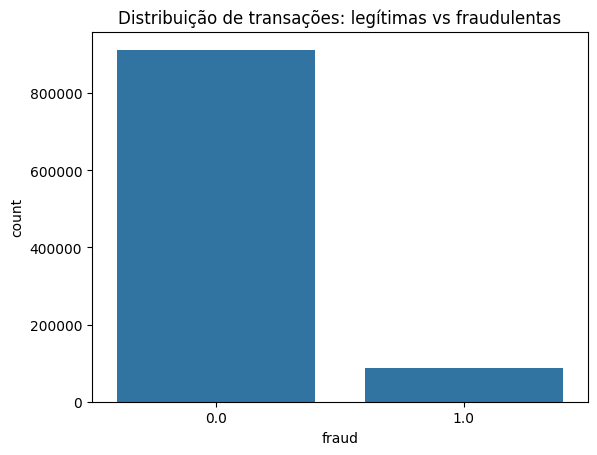

Percentual de fraudes: 8.74%


In [6]:
# Importa o seaborn e o matplotlib pra criar os gráficos
import seaborn as sns, matplotlib.pyplot as plt

# Gráfico mostrando a quantidade de transações legítimas e fraudulentas
sns.countplot(x='fraud', data=df)
plt.title('Distribuição de transações: legítimas vs fraudulentas')
plt.show()

# Calcula o percentual total de fraudes no dataset
fraud_percent = df['fraud'].mean() * 100

# Exibe o percentual de fraudes formatado
print(f"Percentual de fraudes: {fraud_percent:.2f}%")


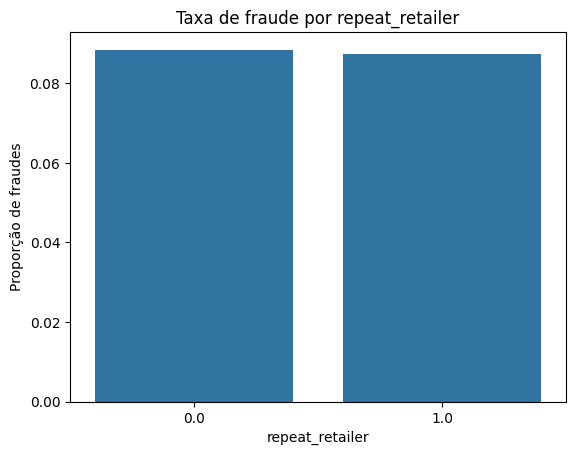

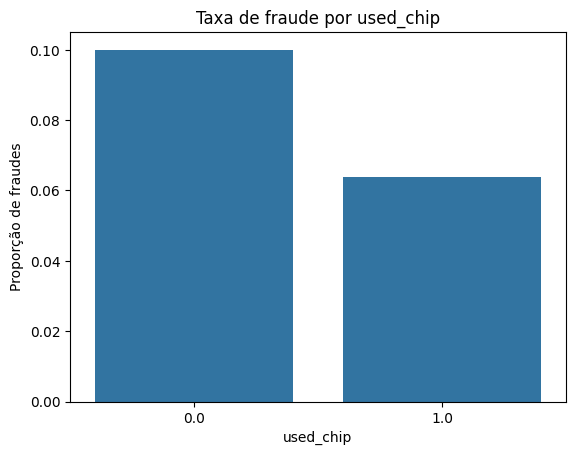

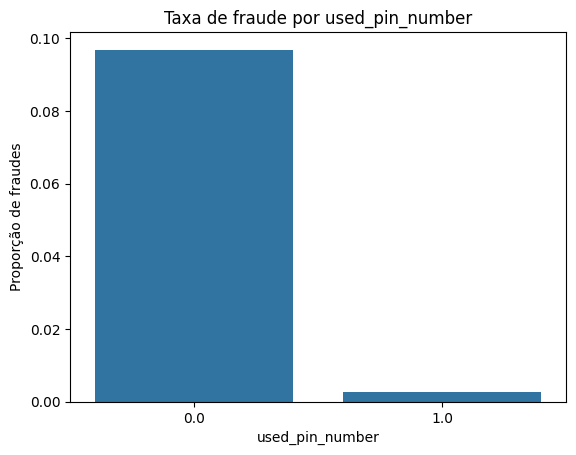

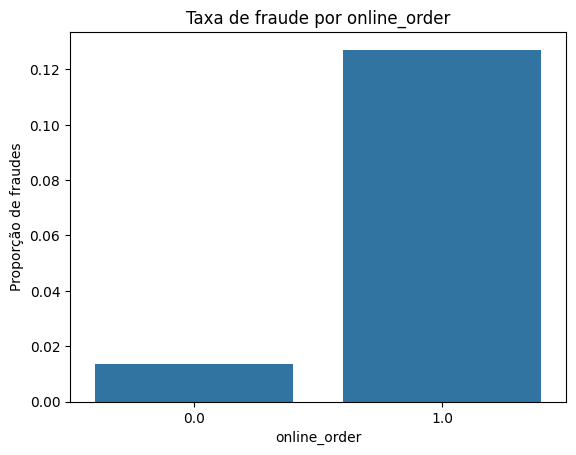

In [7]:
# Lista das colunas binárias que vamos analisar
colunas_binarias = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

# Para cada coluna binária, calcula a taxa de fraude e plota um gráfico de barras
for col in colunas_binarias:
    fraud_rate = df.groupby(col)['fraud'].mean()  # Taxa de fraude pra cada categoria da coluna

    sns.barplot(x=fraud_rate.index, y=fraud_rate.values)  # Gráfico mostrando a proporção de fraudes
    plt.title(f'Taxa de fraude por {col}')
    plt.ylabel('Proporção de fraudes')
    plt.show()


- Utilizamos seaborn e matplotlib para entendermos as variações dos valores fraudulentos vs não fraudulentos.
- Com isso, concluimos que proximadamente 8,7% das transações são fraudulentas. Isso significa que temos muito mais transações normais do que fraudulentas.
- Esse tipo de situação é chamado de classes desbalanceadas, o que pode afetar no resultado final do nosso modelo.
- Definimos um agrupamento pelas colunas binárias. Sendo ele: A combinação de todas as linhas correspondente as colunas binárias que são 0 (ou seja, falso), serão agrupadas e faremos o calculo da media da coluna de fraude, para entendermos a recorrência em que as fraudes ocorrem quando cada recurso é usado ou não pelo cliente.
- Com esse agrupamento fazemos um grafico de colunas para visualizarmos a ocorrência das fraudes (pela seu média), em cada uma das ocorrências.

### Feature Engineering:

In [8]:
# Indica se a compra foi "longe de casa"
df['longe_de_casa'] = (df['distance_from_home'] > 2).astype(int)

# Indica se a compra foi "longe da última transação"
df['longe_da_ult_transac'] = (df['distance_from_last_transaction'] > 2).astype(int)

# Risco baseado em comportamentos suspeitos
df['risk_score'] = (
    (1 - df['used_chip']) +   # Não usou chip
    (1 - df['used_pin_number']) +  # Não usou PIN
    df['online_order'] +       # Foi online
    (1 - df['repeat_retailer'])    # Varejista novo
)

df[['longe_de_casa', 'longe_da_ult_transac', 'risk_score']].head()


,longe_de_casa,longe_da_ult_transac,risk_score
0,0,0,1.0
1,0,0,2.0
2,0,0,3.0
3,0,0,2.0
4,0,0,2.0


- Criamos duas novas variáveis para as colunas 'distance_from_home' e 'distance_from_the_last_transaction', que entendemos serem valores chaves para a previsão de fraude.

- Com base nessas variáveis, criamos uma nova variavel chamada score de risco. Onde os valores que consideramos prováveis de fraude são combinados e transformados em uma váriavel define o que pode ser mais propenso a fraude e o que não.

### Construção do Modelo Preditivo:

In [9]:
# Separa as features, removendo a coluna alvo ('fraud')
X = df.drop('fraud', axis=1)

# Guarda a coluna alvo, que vamos tentar prever
y = df['fraud']

# Mostra o tamanho do conjunto de dados depois da separação
print("Tamanho do conjunto de dados:", X.shape)


Tamanho do conjunto de dados: (1000000, 10)


In [10]:
# Importa ferramentas para dividir o dataset, treinar modelo e avaliar resultados
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE

# Divide o dataset em treino e teste, mantendo a proporção de fraude (stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Mostra quantos dados ficaram no treino e no teste
print("Treino:", X_train.shape, "Teste:", X_test.shape)

# Exibe a distribuição da classe 'fraud' no conjunto de treino
print("Distribuição original da fraude no treino:\n", y_train.value_counts())

Treino: (700000, 10) Teste: (300000, 10)
Distribuição original da fraude no treino:
 fraud
0.0    638818
1.0     61182
Name: count, dtype: int64


In [11]:
# Aplica o SMOTE para balancear as classes no conjunto de treino
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Mostra como ficou a distribuição da classe após o balanceamento
print("\nDistribuição após SMOTE:\n", pd.Series(y_train_smote).value_counts())


Distribuição após SMOTE:
 fraud
0.0    638818
1.0    638818
Name: count, dtype: int64


In [12]:
# Cria o modelo de Random Forest com 100 árvores
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treina o modelo usando os dados balanceados pelo SMOTE
model.fit(X_train_smote, y_train_smote)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
# Faz as previsões de classe usando o conjunto de teste
y_pred = model.predict(X_test)

# Pega as probabilidades da classe positiva (fraude) pra métricas como ROC
y_pred_prob = model.predict_proba(X_test)[:,1]

In [14]:
# Mostra o relatório completo com precisão, recall e f1-score
print("Relatório de classificação:\n")
print(classification_report(y_test, y_pred))

Relatório de classificação:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273779
         1.0       1.00      1.00      1.00     26221

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



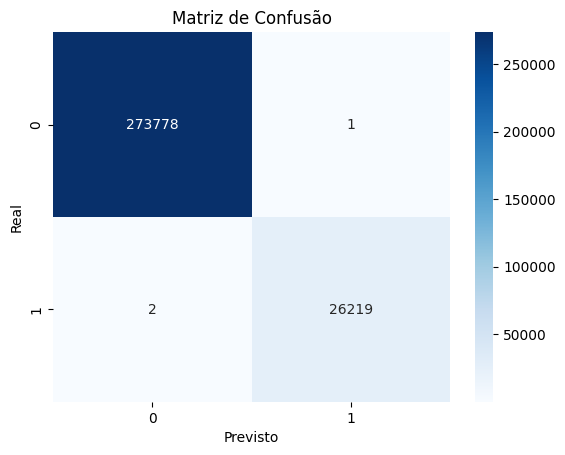

In [15]:
# Calcula a matriz de confusão para avaliar acertos e erros do modelo
cm = confusion_matrix(y_test, y_pred)

# Plota a matriz em forma de heatmap pra facilitar a visualização
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Ajusta os rótulos do gráfico
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

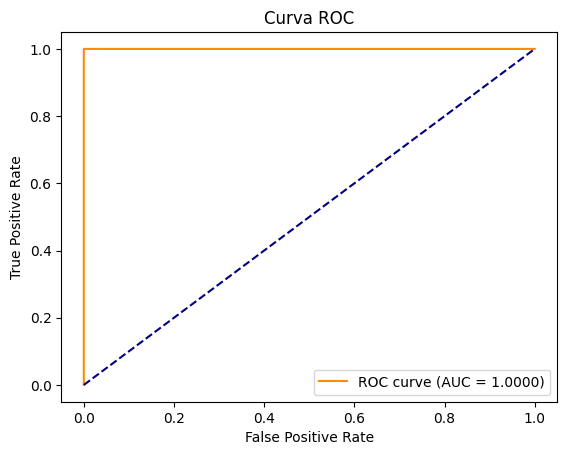

In [16]:
# Calcula as taxas de falso positivo (fpr), verdadeiro positivo (tpr) e os thresholds da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcula a área sob a curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plota a curva ROC para avaliar a performance do modelo
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.4f)' % roc_auc)

# Linha diagonal de referência (modelo aleatório)
plt.plot([0,1], [0,1], color='navy', linestyle='--')

# Ajuste dos rótulos e título
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## Conclusão

- Importamos bibliotecas essenciais para modelo
- Definimos variáveis de teste e treino (para que possamos visualizar o desempenho do modelo nas duas variações)
- Distribuição balanceada com smote, para que não ocorra desproporção entre classes.
- Utilizamos o RandomForest para treuinar o modelo e criar as previões com as variáveis de teste e amrazena-las para a criação das visualizações
- Chegamos a um esqueleto de modelo ótimo, com quase nenhum erro em previsão, porém a maquina apresneta 1.0 de precision e recall, não é algo que significa positividade, basicamente ela não aprendeu e sim decorou. Podemos visualizar esses dados detalhadamente pelas visões de Matriz e Curva ROC.
- Com esse modelo, a instituição financeira não teria uma acuracidade significativamente confiável ao identificar transações fraudulentas, podendo não garantir sua segurança interna e também a confiança com o usuário.